# Q1

In [43]:
import cv2
import os
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [37]:
IMG_FILE = "./images/unnamed.jpg"

# %matplotlib nbagg
%matplotlib inline

img = cv2.imread(IMG_FILE)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(341, 512)

In [50]:
MAX_GRAY_LEVEL = 16

def get_max_pix(img):
    max_pix_val = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x][y] > max_pix_val:
                max_pix_val = img[x][y]
    return max_pix_val

def get_all_features_together(p):
    # Asm - Angular Second Moment
    # Ent - Entropy
    # Con - Contrast
    # Idm - Inverse Differential Moment
    Con, Ent, Asm, Idm = 0.0, 0.0, 0.0, 0.0
    for i in range(MAX_GRAY_LEVEL):
        for j in range(MAX_GRAY_LEVEL):
            Con += p[i][j]*(i-j)*(i-j)
            Asm += p[i][j]**2
            Idm += p[i][j]/(1+(i-j)*(i-j))
            if p[i][j] > 0.0:
                Ent += p[i][j]*math.log(p[i][j])
    return Asm, Con, -Ent, Idm

def get_GLCM(img, x_distance, y_distance):
    output_img = np.zeros(img.shape, np.uint8)
    ret = [[0.0] * MAX_GRAY_LEVEL] * MAX_GRAY_LEVEL
    
    found_max_pix_val = get_max_pix(img)
    
    if MAX_GRAY_LEVEL > found_max_pix_val:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                output_img[i][j] = img[i][j] * MAX_GRAY_LEVEL / found_max_pix_val
                
    for i in range(img.shape[0] - x_distance):
        for j in range(img.shape[1] - y_distance):
            rows = output_img[i][j]
            cols = output_img[i+x_distance][j+y_distance]
            ret[rows][cols] += 1.0
            
    ret_np = np.asarray(ret)
    ret_np = ret_np / float(img.shape[0] * img.shape[1])
    
    return ret_np


glcm_array = get_GLCM(img_gray, 1,0)

asm, con, ent, idm = get_all_features_together(glcm_array)

# print(asm, con, ent, idm)
print("Angular Second Moment       : ", asm)
print("Entropy                     : ", ent)
print("Contrast                    : ", con)
print("Inverse Differential Moment : ", idm)

Angular Second Moment       :  15.906295955487138
Entropy                     :  0.04685195490558603
Contrast                    :  1236.3636363636363
Inverse Differential Moment :  2.0063682860108565


# Q2

In [3]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [7]:
IMG_FILE = "./images/unnamed.jpg"

In [10]:
# %matplotlib nbagg
%matplotlib inline

img = cv2.imread(IMG_FILE)
img.shape

(341, 512, 3)

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(341, 512)

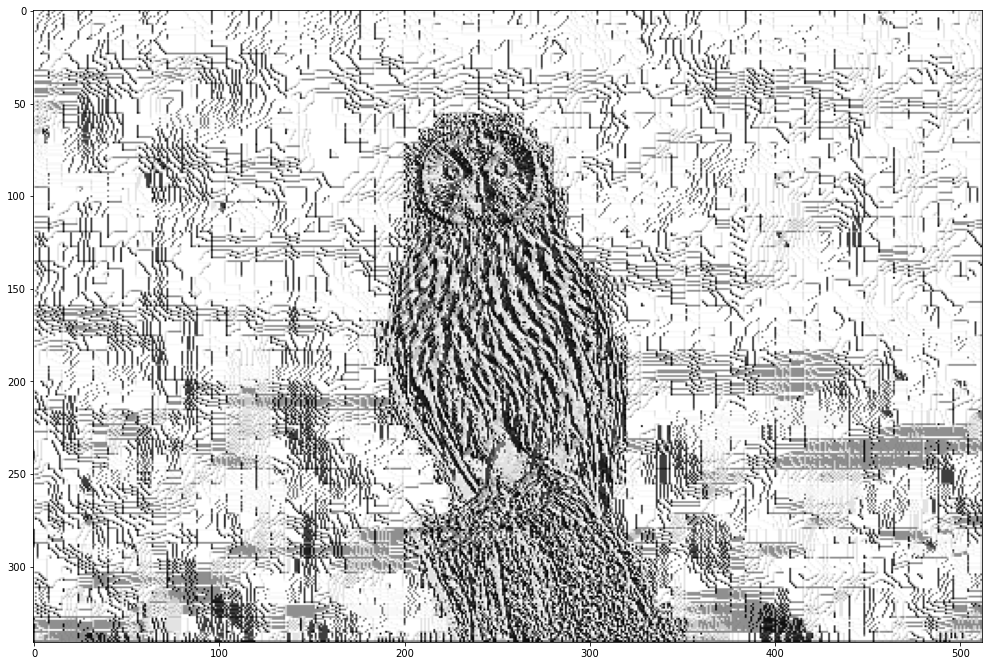

In [34]:
POWER_VAL = [1, 2, 4, 8, 16, 32, 64, 128]


def pix_thresholding(curr_pix_x, curr_pix_y, cent_pix, img):
    try:
        curr_pix = img[curr_pix_x][curr_pix_y]        
        if curr_pix >= cent_pix:
            return 1
        else:
            return 0
    except:
        return 0    


def calculate_lbp(img):
    output_img = np.zeros(img.shape, np.uint8)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            
            center_pix = img[i][j]
            
            neighbour_thresholded_pixels = []
            
            # first row all cols
            for y in range(-1, 2):
                th_val = pix_thresholding(i-1, j+y, center_pix, img)   
                neighbour_thresholded_pixels.append(th_val)
                
            # middle last col
            th_val = pix_thresholding(i, j+1, center_pix, img)  
            neighbour_thresholded_pixels.append(th_val)
                
            # last row all cols
            for y in range(1, -2, -1):
                th_val = pix_thresholding(i+1, j+y, center_pix, img)   
                neighbour_thresholded_pixels.append(th_val)
                
            # middle first col
            th_val = pix_thresholding(i, j-1, center_pix, img) 
            neighbour_thresholded_pixels.append(th_val)
                
            # convert binary to decimal
            dec_val = 0
            for k in range(len(neighbour_thresholded_pixels)):
                dec_val += neighbour_thresholded_pixels[k] * POWER_VAL[k]
                
            output_img[i][j] = dec_val
    return output_img

            
output_gray = calculate_lbp(img_gray)
    
    
fig, ax = plt.subplots(figsize=(17, 17))
# ax.imshow(img, cmap=plt.cm.gray)
# plt.imshow(output_gray, cmap ="gray")
ax.imshow(output_gray, cmap=plt.cm.gray)
plt.show()

In [35]:
fig.savefig('lbp_output_img.png', dpi=fig.dpi)

# Q3

## Applying LBP

In [56]:
input_img_file = "./images/comb-1.raw"

# img = cv2.imread(input_img_file)
# img
# img.shape
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray.shape

In [66]:
# data = open(input_img_file).read()
# # x = np.frombuffer(data, dtype='uint8').reshape(2048,2448)
# # cv2.imshow('x',x)

#read the data from the file
with open(input_img_file, 'rb') as infile:
     buf = infile.read()

#use numpy to construct an array from the bytes
x = np.fromstring(buf, dtype='uint8')
print(x.shape)

#decode the array into an image
img = cv2.imdecode(x, cv2.IMREAD_UNCHANGED)
img
# img.shape
#show it
# cv2.imshow("some window", img)

(260100,)


<ipython-input-66-831784b254fa>:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  x = np.fromstring(buf, dtype='uint8')


In [69]:
import rawpy
import imageio

raw = rawpy.imread(input_img_file)
rgb = raw.postprocess()

LibRawFileUnsupportedError: b'Unsupported file format or not RAW file'